In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [34]:
df_vendas = pd.DataFrame.from_dict(dados_vendas)


In [40]:
df_vendas['mes_numero'] = range(1,13)

In [41]:
df_vendas

,mes,vendas,mes_numero
0,janeiro,2000,1
1,fevereiro,2200,2
2,março,2300,3
3,abril,2500,4
4,maio,2600,5
5,junho,2700,6
6,julho,2800,7
7,agosto,2900,8
8,setembro,3000,9
9,outubro,3100,10


In [17]:
# importar bibliotecas do skilearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [46]:
# Modelo
x = pd.DataFrame(df_vendas['mes_numero'])
y = df_vendas['vendas']

In [47]:
# Dividir conjunto entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=51)

In [52]:
# Treinar o algoritmo de Regressão Linear
model = LinearRegression().fit(x_train, y_train)

In [53]:
# Gerar Predição com base no modelo para o conjunto de testes
y_pred = model.predict(x_test)

In [60]:
# R2 Score - COnjunto de Treinamento
model.score(x_train, y_train)

0.990709949854843

In [59]:
# R2 Score - Treinamento
r2_score(y_test, y_pred)

0.9631440781440782

In [57]:
# MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

np.float64(36.66666666666663)

In [80]:
# Prever a venda de dezembro
venda_dezembro = model.predict([[12]])
venda_dezembro

c:\Users\julia\.virtualenvs\modelo_diabetes-Mgz4Pc8O\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3333.33333333])

Text(0.5, 0.98, 'Histogramas de Vendas e Meses')

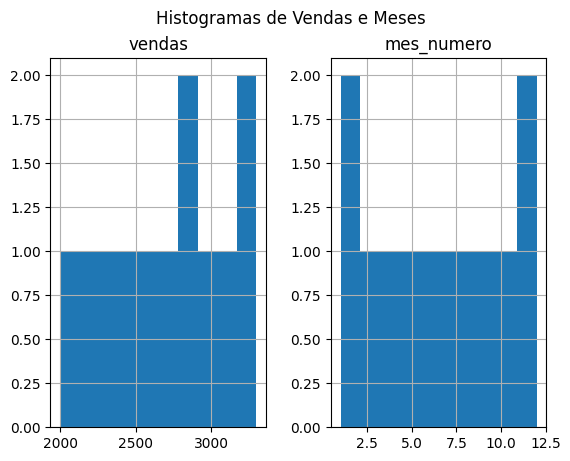

In [88]:
df_vendas.hist()
plt.suptitle('Histogramas de Vendas e Meses')

Text(0, 0.5, 'Vendas')

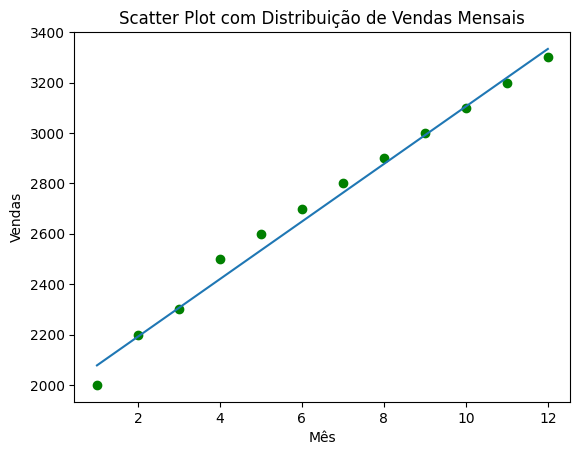

In [87]:
plt.scatter(df_vendas.mes_numero, df_vendas.vendas, color='g')
plt.plot(df_vendas.mes_numero, model.predict(df_vendas[['mes_numero']]))
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
